In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from Bio import Entrez
from tqdm import tqdm

In [4]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


In [284]:
gene_symbols = data["gene-symbol"].values

In [272]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",3.0,0,5
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,3.0,0,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",3.0,0,6
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,3.0,0,4
4,9,ACE,angiotensin I converting enzyme,ENSG00000159640,17,"Rare Single Gene Mutation, Genetic Association",3.0,0,3
...,...,...,...,...,...,...,...,...,...
1018,9,ZMYM2,zinc finger MYM-type containing 2,ENSG00000121741,13,"Rare Single Gene Mutation, Syndromic",2.0,1,6
1019,9,ZMYND8,zinc finger MYND-type containing 8,ENSG00000101040,20,Rare Single Gene Mutation,1.0,0,4
1020,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,Genetic Association,3.0,0,1
1021,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Syndromic, Genetic Association",NaN,1,3


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

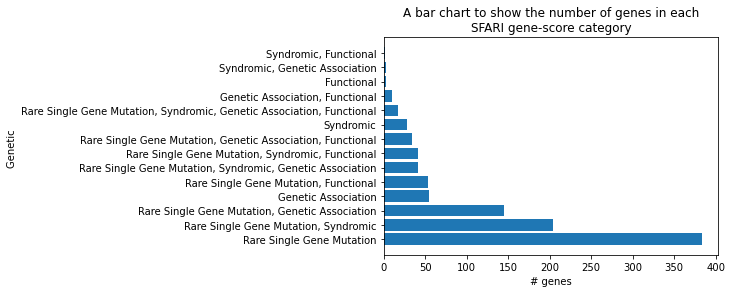

In [5]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.barh(gene_cat_vals, gene_cat_counts)
plt.xlabel("# genes")
plt.ylabel("Genetic ")
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

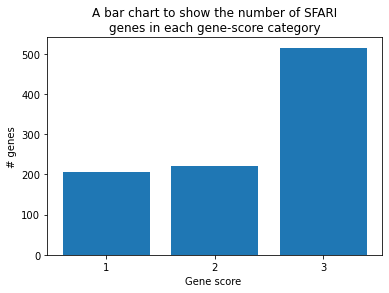

In [65]:
gene_cats_data = data['gene-score']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

fig = plt.figure()
plt.bar(gene_cat_vals, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(gene_cat_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1.pdf', dpi=fig.dpi)

In [61]:
gene_cat_vals

array([ 3.,  2.,  1., nan])

['1', '2', '3', 'S']


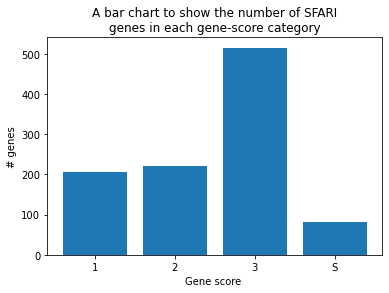

In [271]:
gene_cats_data = data.sort_values("gene-score")['gene-score']
gene_cat_vals = gene_cats_data.unique()
gene_cat_counts = []
for g in gene_cat_vals:
    if np.isnan(g):
        score_indexes = gene_cats_data[gene_cats_data.isnull()].index
    else:
        score_indexes = gene_cats_data[gene_cats_data == g].index
    gene_cat_counts.append(score_indexes.size)
    

A, B = gene_cat_vals.size, len(gene_cat_counts)
assert(A == B)

ticks = np.arange(gene_cat_vals.size)
tick_vals = ["1", "2", "3", "S"]#[str(int(val)) for val in gene_cat_vals]
print(tick_vals)

fig = plt.figure()
plt.bar(ticks, gene_cat_counts)
plt.ylabel("# genes")
plt.xlabel("Gene score ")
plt.xticks(ticks, tick_vals)
plt.title("A bar chart to show the number of SFARI\ngenes in each gene-score category")
fig.savefig(f'{os.getcwd()}/results/task1-1-v2.pdf', dpi=fig.dpi)

# task 2

In [157]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [118]:
gs = data["gene-symbol"]
data.iloc[gs[gs == "RP11-1407O15.2"].index[0]]

status                                       9
gene-symbol                     RP11-1407O15.2
gene-name                                  NaN
ensembl-id                                 NaN
chromosome                                  17
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            1
Name: 771, dtype: object

In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [7]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
68

789
75

510
90

812
92

596
94



# task 3

In [ ]:
# This task was completed manually

# task 4

In [229]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [ ]:
# Getting gene-names and ensemblIDs for the above genes^

In [285]:
gs = data["gene-symbol"]
ensembls = []
names = []

for g in gene_symbols:
    idx = gs[gs == g].index[0]
    ensembls.append(data["ensembl-id"].iloc[idx])
    names.append(data["gene-name"].iloc[idx])

In [ ]:
# load data manually from CSVs

In [83]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [84]:
year_data2 = []
#citation_data = []
#pmids = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())
    #citation_data.append(gene_data["Citation"].values.size)
    #pmids.append(gene_data["PMID"].values.tolist())

In [85]:
gene_data["Citation"]

0     Epilepsia. 2019 Dec;60 Suppl 3:S17-S24. doi: 1...
1     Neuron. 2020 May 6;106(3):421-437.e11. doi: 10...
2     Nature. 2012 Apr 4;485(7397):246-50. doi: 10.1...
3     Nature. 2012 Sep 20;489(7416):385-90. doi: 10....
4     Nat Genet. 2011 Jun;43(6):585-9. doi: 10.1038/...
                            ...                        
63    Pract Neurol. 2017 Aug;17(4):314-317. doi: 10....
64    J Pediatr Neurosci. 2012 May;7(2):123-5. doi: ...
65    J Neurosci. 2004 Mar 17;24(11):2690-8. doi: 10...
66    Gene. 2013 Dec 15;532(2):294-6. doi: 10.1016/j...
67    J Child Neurol. 2004 Aug;19(8):597-603. doi: 1...
Name: Citation, Length: 68, dtype: object

In [ ]:
# load data dynamically from NCBI

In [165]:
for i in tqdm(gene_symbols):
    i

100%|██████████████████████████████████| 1023/1023 [00:00<00:00, 5138650.29it/s]


In [273]:
Entrez.email = "s1803764@ed.ac.uk"
all_gene_dates = []
#ll_dates = []
zwilch = dates

for j, g in tqdm(enumerate(gene_symbols)):
    if j == 1022:
        all_gene_dates.append(zwilch)
    else:
        handle = Entrez.esearch(db="pubmed",retmax=10000, term=f"({g}[TW] OR {names[j]}[TW] OR {ensembls[j]}[TW]) AND (autism[MH] OR autistic[MH] OR ASD[TW] OR \"autism spectrum disorder\"[TW] OR \"pervasive developmental disorder\"[TW] OR PDD-NOS[TW] OR PDD[TW] OR asperger[MH])")
        record = Entrez.read(handle)
        ids = record["IdList"]
        #print(record["ErrorList"]["PhraseNotFound"])

        dates = []
        for i in tqdm(ids):
            handle2 = Entrez.esummary(db="pubmed", retmax=5000, id=i)
            meta_data = Entrez.read(handle2)[0]
            #print(meta_data["PubDate"])
            #print(meta_data["Title"])
            dates.append(meta_data["PubDate"][0:4])

        all_gene_dates.append(dates)
    #all_gene_dates[j] = dates

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
1it [00:03,  3.20s/it]
0it [00:00, ?it/s]
2it [00:04,  1.93s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.62it/s]
3it [00:07,  2.69s/it]
0it [00:00, ?it/s]
4it [00:08,  1.87s/it]
100%|███████████████████████████████████████████| 24/24 [00:14<00:00,  1.61it/s]
5it [00:24,  6.81s/it]
0it [00:00, ?it/s]
6it [00:24,  4.76s/it]
100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.01s/it]
7it [00:27,  4.07s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.57it/s]
8it [00:31,  4.06s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]
9it [00:32,  3.23s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
10it [00:34,  2.64s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.65it/s]
11it [00:42,  4.45s/it]
100%|████████████████

100%|███████████████████████████████████████████| 42/42 [00:25<00:00,  1.63it/s]
15it [01:12,  9.47s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.25it/s]
16it [01:14,  7.30s/it]
100%|███████████████████████████████████████████| 47/47 [00:27<00:00,  1.72it/s]
17it [01:42, 13.56s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.48it/s]
18it [01:49, 11.53s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
19it [01:52,  8.85s/it]
0it [00:00, ?it/s]
20it [01:52,  6.41s/it]
0it [00:00, ?it/s]
21it [01:53,  4.67s/it]
0it [00:00, ?it/s]
22it [01:54,  3.45s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
23it [01:55,  2.76s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.40it/s]
24it [01:58,  2.79s/it]
0it [00:00, ?it/s]
25it [01:58,  2.15s/it]
0it [00:00, ?it/s]
26it [01:59,  1.70s/it]
100%|█████████████████████████████████████████████

100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
28it [02:03,  1.82s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.40it/s]
29it [02:06,  2.32s/it]
0it [00:00, ?it/s]
30it [02:07,  1.83s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.50it/s]
31it [02:10,  2.10s/it]
0it [00:00, ?it/s]
32it [02:10,  1.69s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.86it/s]
33it [02:12,  1.71s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.70it/s]
34it [02:17,  2.64s/it]
100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.52it/s]
35it [02:23,  3.64s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.56it/s]
36it [02:31,  5.06s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.62it/s]
37it [02:41,  6.33s/it]
0it [00:00, ?it/s]
38it [02:41,  4.65s/it]
0it [00:00, ?it/s]
39it [02:42,

100%|███████████████████████████████████████████| 25/25 [00:15<00:00,  1.66it/s]
53it [03:17,  5.91s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.01it/s]
54it [03:19,  4.62s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
55it [03:21,  3.82s/it]
100%|███████████████████████████████████████████| 15/15 [00:09<00:00,  1.58it/s]
56it [03:31,  5.71s/it]
0it [00:00, ?it/s]
57it [03:32,  4.20s/it]
0it [00:00, ?it/s]
58it [03:32,  3.12s/it]
0it [00:00, ?it/s]
59it [03:33,  2.38s/it]
100%|███████████████████████████████████████████| 13/13 [00:08<00:00,  1.55it/s]
60it [03:42,  4.37s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.52it/s]
61it [03:44,  3.85s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]
62it [03:52,  4.84s/it]
0it [00:00, ?it/s]
63it [03:52,  3.59s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.69it/s]
64it [03:57,

100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.59it/s]
69it [04:13,  3.79s/it]
100%|███████████████████████████████████████████| 35/35 [00:23<00:00,  1.50it/s]
70it [04:37,  9.85s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.59it/s]
71it [04:46,  9.41s/it]
0it [00:00, ?it/s]
72it [04:46,  6.79s/it]
100%|███████████████████████████████████████████| 26/26 [00:16<00:00,  1.53it/s]
73it [05:04, 10.03s/it]
0it [00:00, ?it/s]
74it [05:05,  7.30s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.76it/s]
75it [05:08,  5.95s/it]
0it [00:00, ?it/s]
76it [05:08,  4.34s/it]
0it [00:00, ?it/s]
77it [05:09,  3.22s/it]
 60%|███████████████████████████                  | 3/5 [00:01<00:01,  1.64it/s]


100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
78it [05:12,  3.34s/it]
0it [00:00, ?it/s]
79it [05:13,  2.59s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]
80it [05:15,  2.44s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
81it [05:17,  2.15s/it]
100%|███████████████████████████████████████████| 60/60 [00:39<00:00,  1.53it/s]
82it [05:57, 13.49s/it]
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.10s/it]
83it [06:03, 11.17s/it]
0it [00:00, ?it/s]
84it [06:04,  8.33s/it]
100%|█████████████████████████████████████████████| 3/3 [00:09<00:00,  3.28s/it]
85it [06:18,  9.98s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]
86it [06:21,  7.85s/it]
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.50s/it]
87it [06:25,  6.83s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.4

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.56s/it]
91it [06:44,  5.62s/it]
0it [00:00, ?it/s]
92it [06:47,  4.79s/it]
100%|█████████████████████████████████████████████| 1/1 [00:02<00:00,  2.56s/it]
93it [06:52,  4.72s/it]
0it [00:00, ?it/s]
94it [06:53,  3.55s/it]
0it [00:00, ?it/s]
95it [06:55,  3.19s/it]
100%|███████████████████████████████████████████| 12/12 [00:21<00:00,  1.76s/it]
96it [07:19,  9.31s/it]
0it [00:00, ?it/s]
97it [07:19,  6.79s/it]
100%|█████████████████████████████████████████████| 9/9 [00:08<00:00,  1.00it/s]
98it [07:30,  7.91s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
99it [07:34,  6.72s/it]
 68%|█████████████████████████████▎             | 60/88 [01:07<00:33,  1.21s/it]


100%|███████████████████████████████████████████| 88/88 [01:33<00:00,  1.07s/it]
100it [09:09, 33.13s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.56it/s]
101it [09:19, 26.18s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.71it/s]
102it [09:22, 19.26s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.57it/s]
103it [09:24, 14.27s/it]
100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.23s/it]
104it [09:29, 11.50s/it]
100%|███████████████████████████████████████████| 12/12 [00:09<00:00,  1.32it/s]
105it [09:40, 11.27s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]
106it [09:43,  8.62s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.26it/s]
107it [09:45,  6.75s/it]
100%|█████████████████████████████████████████████| 2/2 [00:04<00:00,  2.32s/it]
108it [09:51,  6.45s/it]
100%|█████████████████████████████████████████

100%|███████████████████████████████████████████| 19/19 [00:56<00:00,  2.99s/it]
110it [11:18, 27.32s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.24it/s]
111it [11:22, 20.32s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.18s/it]
112it [11:24, 14.82s/it]
100%|███████████████████████████████████████████| 18/18 [00:32<00:00,  1.79s/it]
113it [11:57, 20.26s/it]
100%|█████████████████████████████████████████████| 7/7 [00:10<00:00,  1.46s/it]
114it [12:10, 17.87s/it]
0it [00:00, ?it/s]
115it [12:10, 12.69s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.46it/s]
116it [12:14,  9.91s/it]
0it [00:00, ?it/s]
117it [12:15,  7.23s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
118it [29:06, 308.53s/it]
0it [00:00, ?it/s]
119it [29:07, 216.16s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.69it/s]
120it [29:17, 154.35s/it]
0it [00:00, ?it/s

100%|███████████████████████████████████████████| 44/44 [00:27<00:00,  1.62it/s]
131it [29:58, 11.98s/it]
0it [00:00, ?it/s]
132it [29:59,  8.62s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.42it/s]
133it [30:00,  6.44s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.54it/s]
134it [30:03,  5.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
135it [30:04,  4.09s/it]
0it [00:00, ?it/s]
136it [30:05,  3.08s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.66it/s]
137it [30:10,  3.48s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.64it/s]
138it [30:16,  4.29s/it]
0it [00:00, ?it/s]
139it [30:16,  3.21s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.47it/s]
140it [30:23,  4.30s/it]
0it [00:00, ?it/s]
141it [30:24,  3.21s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
1

100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.58it/s]
145it [30:44,  6.15s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
146it [30:46,  4.71s/it]
0it [00:00, ?it/s]
147it [30:46,  3.52s/it]
100%|█████████████████████████████████████████████| 2/2 [00:02<00:00,  1.28s/it]
148it [30:50,  3.48s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.35it/s]
149it [30:52,  3.22s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.55it/s]
150it [30:55,  3.04s/it]
0it [00:00, ?it/s]
151it [30:56,  2.33s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.68it/s]
152it [30:58,  2.37s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
153it [30:59,  2.01s/it]
0it [00:00, ?it/s]
154it [31:00,  1.59s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
155it [31:01,  1.52s/it]
100%|███████████████

100%|█████████████████████████████████████████| 100/100 [01:00<00:00,  1.66it/s]
160it [32:23, 21.61s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
161it [32:25, 15.77s/it]
0it [00:00, ?it/s]
162it [32:26, 11.22s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
163it [32:27,  8.22s/it]
 32%|██████████████                              | 8/25 [00:04<00:09,  1.74it/s]


100%|███████████████████████████████████████████| 25/25 [00:15<00:00,  1.66it/s]
164it [32:43, 10.49s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.53it/s]
165it [32:44,  7.75s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.60it/s]
166it [32:46,  5.85s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.49it/s]
167it [32:48,  4.70s/it]
0it [00:00, ?it/s]
168it [32:48,  3.49s/it]
0it [00:00, ?it/s]
169it [32:49,  2.64s/it]
0it [00:00, ?it/s]
170it [32:50,  2.03s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]
171it [32:51,  1.97s/it]
0it [00:00, ?it/s]
172it [32:52,  1.58s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
173it [32:53,  1.45s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.56it/s]
174it [32:56,  1.79s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
1

100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.73it/s]
184it [33:38,  7.46s/it]
 60%|█████████████████████████                 | 86/144 [00:53<00:35,  1.62it/s]


100%|█████████████████████████████████████████| 144/144 [01:27<00:00,  1.64it/s]
185it [35:06, 31.77s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.19it/s]
186it [35:08, 22.69s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
187it [35:10, 16.64s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.50it/s]
188it [35:14, 12.64s/it]
0it [00:00, ?it/s]
189it [35:14,  9.05s/it]
0it [00:00, ?it/s]
190it [35:15,  6.51s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
191it [35:17,  5.09s/it]
100%|███████████████████████████████████████████| 14/14 [00:08<00:00,  1.66it/s]
192it [35:26,  6.29s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.67it/s]
193it [35:30,  5.55s/it]
  0%|                                                     | 0/8 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.58it/s]
194it [35:35,  5.59s/it]
0it [00:00, ?it/s]
195it [35:36,  4.10s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
196it [35:40,  3.99s/it]
0it [00:00, ?it/s]
197it [35:40,  2.97s/it]
0it [00:00, ?it/s]
198it [35:41,  2.32s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.60it/s]
199it [35:48,  3.80s/it]
0it [00:00, ?it/s]
200it [35:49,  2.84s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.60it/s]
201it [35:52,  2.81s/it]
100%|███████████████████████████████████████████| 12/12 [00:08<00:00,  1.36it/s]
202it [36:01,  4.79s/it]
0it [00:00, ?it/s]
203it [36:02,  3.55s/it]
0it [00:00, ?it/s]
204it [36:02,  2.67s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]
205it [36:04,  2.28s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
206it [36:05,  2.00

100%|███████████████████████████████████████████| 35/35 [00:22<00:00,  1.53it/s]
212it [36:39,  8.43s/it]
0it [00:00, ?it/s]
213it [36:40,  6.13s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
214it [36:41,  4.67s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.61it/s]
215it [36:44,  4.22s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
216it [36:46,  3.52s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.65it/s]
217it [36:52,  4.13s/it]
0it [00:00, ?it/s]
218it [36:52,  3.11s/it]
0it [00:00, ?it/s]
219it [36:53,  2.41s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.56it/s]
220it [36:57,  2.86s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]
221it [36:58,  2.41s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
222it [37:00,  2.25s/it]
100%|███████████████

100%|███████████████████████████████████████████| 31/31 [00:20<00:00,  1.51it/s]
232it [38:01,  9.84s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]
233it [38:05,  8.22s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
234it [38:07,  6.14s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
235it [38:08,  4.66s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
236it [38:10,  3.84s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
237it [38:12,  3.27s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
238it [38:15,  3.21s/it]
0it [00:00, ?it/s]
239it [38:15,  2.48s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.62it/s]
240it [38:19,  2.67s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
241it [38:20,  2.27s/it]
10

100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.75it/s]
253it [38:47,  3.16s/it]
100%|█████████████████████████████████████████████| 4/4 [00:04<00:00,  1.18s/it]
254it [38:53,  3.96s/it]
100%|███████████████████████████████████████████| 11/11 [00:07<00:00,  1.57it/s]
255it [39:01,  5.06s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.60it/s]
256it [39:06,  5.04s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
257it [39:08,  4.09s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.55it/s]
258it [39:12,  4.24s/it]
0it [00:00, ?it/s]
259it [39:13,  3.17s/it]
100%|███████████████████████████████████████████| 11/11 [00:09<00:00,  1.13it/s]
260it [39:23,  5.34s/it]
100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.19it/s]
261it [39:33,  6.51s/it]
100%|███████████████████████████████████████████| 10/10 [00:25<00:00,  2.51s/it]
262it [39:59, 12.34s/it]
10

100%|███████████████████████████████████████████| 33/33 [00:20<00:00,  1.65it/s]
266it [40:33, 11.72s/it]
100%|███████████████████████████████████████████| 16/16 [00:11<00:00,  1.37it/s]
267it [40:46, 11.90s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.54it/s]
268it [40:51,  9.92s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.32it/s]
269it [40:59,  9.20s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.48it/s]
270it [41:01,  7.09s/it]
0it [00:00, ?it/s]
271it [41:01,  5.16s/it]
0it [00:00, ?it/s]
272it [41:02,  3.83s/it]
0it [00:00, ?it/s]
273it [41:03,  2.86s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
274it [41:05,  2.56s/it]
0it [00:00, ?it/s]
275it [41:05,  1.97s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
276it [41:07,  1.99s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]
2

100%|███████████████████████████████████████████| 26/26 [00:17<00:00,  1.48it/s]
280it [41:33,  7.07s/it]
0it [00:00, ?it/s]
281it [41:34,  5.16s/it]
100%|███████████████████████████████████████████| 24/24 [00:18<00:00,  1.31it/s]
282it [41:53,  9.31s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
283it [41:54,  6.86s/it]
0it [00:00, ?it/s]
284it [41:55,  4.99s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.72it/s]
285it [41:57,  4.21s/it]
 79%|██████████████████████████████████         | 42/53 [00:34<00:07,  1.50it/s]


100%|███████████████████████████████████████████| 53/53 [00:41<00:00,  1.28it/s]
286it [42:39, 15.52s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.63it/s]
287it [42:42, 11.65s/it]
0it [00:00, ?it/s]
288it [42:42,  8.36s/it]
0it [00:00, ?it/s]
289it [42:44,  6.22s/it]
0it [00:00, ?it/s]
290it [42:45,  4.66s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.38it/s]
291it [42:46,  3.72s/it]
0it [00:00, ?it/s]
292it [42:47,  2.79s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.41it/s]
293it [42:49,  2.60s/it]
0it [00:00, ?it/s]
294it [42:50,  2.09s/it]
0it [00:00, ?it/s]
295it [42:50,  1.65s/it]
0it [00:00, ?it/s]
296it [42:51,  1.35s/it]
0it [00:00, ?it/s]
297it [42:52,  1.13s/it]
0it [00:00, ?it/s]
298it [42:52,  1.00s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
299it [42:54,  1.19s/it]
0it [00:00, ?it/s]
300it [42:55,  1.05s/it]
100%|█████████████████████████

 32%|████████████▉                            | 123/390 [01:15<02:36,  1.71it/s]


 56%|███████████████████████▏                 | 220/390 [02:19<01:41,  1.67it/s]


 81%|█████████████████████████████████▎       | 317/390 [03:22<00:44,  1.66it/s]


100%|█████████████████████████████████████████| 390/390 [04:12<00:00,  1.55it/s]
315it [47:34, 77.80s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.58it/s]
316it [47:39, 55.98s/it]
 38%|████████████████▎                          | 14/37 [00:08<00:15,  1.53it/s]


100%|███████████████████████████████████████████| 37/37 [00:22<00:00,  1.62it/s]
317it [48:03, 46.24s/it]
100%|███████████████████████████████████████████| 56/56 [00:36<00:00,  1.55it/s]
318it [48:40, 43.42s/it]
0it [00:00, ?it/s]
319it [48:41, 30.83s/it]
0it [00:00, ?it/s]
320it [48:42, 21.78s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.52it/s]
321it [48:46, 16.45s/it]
0it [00:00, ?it/s]
322it [48:46, 11.70s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
323it [48:48,  8.68s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.78it/s]
324it [48:51,  7.13s/it]


100%|███████████████████████████████████████████| 16/16 [00:10<00:00,  1.52it/s]
325it [49:03,  8.36s/it]
0it [00:00, ?it/s]
326it [49:03,  6.03s/it]
0it [00:00, ?it/s]
327it [49:04,  4.42s/it]
0it [00:00, ?it/s]
328it [49:05,  3.28s/it]
0it [00:00, ?it/s]
329it [49:05,  2.53s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
330it [49:08,  2.57s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
331it [49:10,  2.35s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
332it [49:11,  2.02s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
333it [49:13,  1.87s/it]
100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.55it/s]
334it [49:20,  3.45s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.51it/s]
335it [49:24,  3.63s/it]
0it [00:00, ?it/s]
336it [49:24,  2.75s/it]
0it [00:00, ?it/s]
337it [49:25,  2.10

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]
351it [49:56,  3.79s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
352it [49:57,  3.03s/it]
0it [00:00, ?it/s]
353it [49:58,  2.32s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]
354it [50:00,  2.17s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
355it [50:01,  2.06s/it]
100%|█████████████████████████████████████████████| 3/3 [00:02<00:00,  1.40it/s]
356it [50:04,  2.28s/it]
100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.61it/s]
357it [50:19,  6.17s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
358it [50:21,  4.84s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.52it/s]
359it [50:24,  4.10s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
360it [50:27,  3.79s/it]
10

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.82s/it]
369it [51:28,  7.66s/it]
100%|███████████████████████████████████████████| 16/16 [00:20<00:00,  1.31s/it]
370it [51:52, 12.65s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.72it/s]
371it [52:00, 11.34s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
372it [52:02,  8.64s/it]
0it [00:00, ?it/s]
373it [52:03,  6.22s/it]
 85%|████████████████████████████████████▋      | 58/68 [00:38<00:05,  1.68it/s]


100%|███████████████████████████████████████████| 68/68 [00:45<00:00,  1.51it/s]
374it [52:49, 18.10s/it]
0it [00:00, ?it/s]
375it [52:49, 12.86s/it]
100%|███████████████████████████████████████████| 33/33 [00:18<00:00,  1.75it/s]
376it [53:09, 14.87s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.72it/s]
377it [53:13, 11.51s/it]
100%|███████████████████████████████████████████| 20/20 [00:12<00:00,  1.62it/s]
378it [53:26, 11.95s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.71it/s]
379it [53:33, 10.68s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]
380it [53:40,  9.42s/it]


0it [00:00, ?it/s]
381it [53:40,  6.77s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
382it [53:42,  5.13s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
383it [53:43,  3.94s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.68it/s]
384it [53:50,  4.74s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.84it/s]
385it [53:53,  4.33s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
386it [53:54,  3.41s/it]
0it [00:00, ?it/s]
387it [53:55,  2.59s/it]
0it [00:00, ?it/s]
388it [53:56,  2.02s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
389it [53:57,  1.96s/it]
0it [00:00, ?it/s]
390it [53:58,  1.55s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.47it/s]
391it [54:01,  2.12s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
3

404it [54:44,  3.10s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
405it [54:46,  2.73s/it]
0it [00:00, ?it/s]
406it [54:46,  2.13s/it]
100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.66it/s]
407it [54:58,  5.14s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
408it [55:00,  4.15s/it]
0it [00:00, ?it/s]
409it [55:01,  3.07s/it]
0it [00:00, ?it/s]
410it [55:02,  2.37s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]
411it [55:03,  2.05s/it]
0it [00:00, ?it/s]
412it [55:04,  1.65s/it]
0it [00:00, ?it/s]
413it [55:05,  1.49s/it]
0it [00:00, ?it/s]
414it [55:05,  1.27s/it]
100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.59it/s]
415it [55:11,  2.62s/it]
0it [00:00, ?it/s]
416it [55:12,  2.05s/it]
0it [00:00, ?it/s]
417it [55:13,  1.64s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.44it/s]
418it [55:17

100%|███████████████████████████████████████████| 49/49 [00:36<00:00,  1.36it/s]
427it [56:22, 12.50s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.57it/s]
428it [56:26,  9.94s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.73it/s]
429it [56:30,  8.21s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.63it/s]
430it [56:35,  7.25s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
431it [56:36,  5.46s/it]
0it [00:00, ?it/s]
432it [56:37,  4.03s/it]
0it [00:00, ?it/s]
433it [56:37,  3.03s/it]
100%|█████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]
434it [56:43,  3.80s/it]
100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.72it/s]
435it [56:52,  5.48s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.62it/s]
436it [56:57,  5.35s/it]
0it [00:00, ?it/s]
437it [56:58,  3.93s/it]
0it [00:00, ?it/s]
4

100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.52s/it]
441it [57:07,  3.13s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.62it/s]
442it [57:12,  3.90s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]
443it [57:14,  3.15s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.60it/s]
444it [57:18,  3.38s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.65it/s]
445it [57:20,  3.15s/it]
100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.14it/s]
446it [57:25,  3.73s/it]
0it [00:00, ?it/s]
447it [57:26,  2.82s/it]
0it [00:00, ?it/s]
448it [57:27,  2.27s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.74it/s]
449it [57:32,  3.03s/it]
100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.46it/s]
450it [57:39,  4.18s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<0

100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.10it/s]
467it [58:10,  2.26s/it]
0it [00:00, ?it/s]
468it [58:11,  1.79s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69it/s]
469it [58:16,  2.86s/it]
0it [00:00, ?it/s]
470it [58:17,  2.18s/it]
0it [00:00, ?it/s]
471it [58:17,  1.71s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]
472it [58:19,  1.73s/it]
0it [00:00, ?it/s]
473it [58:20,  1.40s/it]
0it [00:00, ?it/s]
474it [58:20,  1.17s/it]
0it [00:00, ?it/s]
475it [58:21,  1.03s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.64it/s]
476it [58:22,  1.09s/it]
0it [00:00, ?it/s]
477it [58:23,  1.02it/s]
0it [00:00, ?it/s]
478it [58:24,  1.12it/s]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
479it [58:26,  1.19s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
480it [58:28,  1.59s/it]
100%|███████

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.65it/s]
494it [59:21,  1.73s/it]
100%|███████████████████████████████████████████| 14/14 [00:09<00:00,  1.49it/s]
495it [59:31,  4.24s/it]
100%|███████████████████████████████████████████| 23/23 [00:14<00:00,  1.59it/s]
496it [59:46,  7.50s/it]
100%|███████████████████████████████████████████| 28/28 [00:16<00:00,  1.65it/s]
497it [1:00:04, 10.54s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.69it/s]
498it [1:00:12,  9.91s/it]
 65%|███████████████████████████▊               | 11/17 [00:06<00:03,  1.77it/s]


100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.73it/s]
499it [1:00:23, 10.09s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
500it [1:00:24,  7.61s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.70it/s]
501it [1:00:28,  6.44s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.69it/s]
502it [1:00:30,  5.08s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.58it/s]
503it [1:00:33,  4.34s/it]
100%|███████████████████████████████████████████| 21/21 [00:12<00:00,  1.63it/s]
504it [1:00:46,  7.14s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
505it [1:00:48,  5.38s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
506it [1:00:50,  4.34s/it]
0it [00:00, ?it/s]
507it [1:00:50,  3.22s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.49it/s]
508it [1:

 49%|███████████████████▉                     | 127/261 [01:14<01:19,  1.68it/s]


 86%|███████████████████████████████████▏     | 224/261 [02:10<00:22,  1.66it/s]


100%|█████████████████████████████████████████| 261/261 [02:31<00:00,  1.72it/s]
511it [1:03:31, 47.82s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]
512it [1:03:33, 34.04s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
513it [1:03:34, 24.18s/it]
0it [00:00, ?it/s]
514it [1:03:34, 17.11s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.67it/s]
515it [1:03:40, 13.78s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.84it/s]
516it [1:03:43, 10.32s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
517it [1:03:45,  7.97s/it]
0it [00:00, ?it/s]
518it [1:03:46,  5.79s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
519it [1:03:47,  4.42s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.52it/s]
520it [1:03:50,  3.91s/it]
100%|███████████████████████████████████████

100%|███████████████████████████████████████████| 31/31 [00:17<00:00,  1.73it/s]
524it [1:04:22,  8.47s/it]
0it [00:00, ?it/s]
525it [1:04:23,  6.17s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
526it [1:04:24,  4.67s/it]
0it [00:00, ?it/s]
527it [1:04:25,  3.45s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.75it/s]
528it [1:04:28,  3.29s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
529it [1:04:29,  2.68s/it]
0it [00:00, ?it/s]
530it [1:04:30,  2.10s/it]
0it [00:00, ?it/s]
531it [1:04:31,  1.65s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]
532it [1:04:32,  1.52s/it]
0it [00:00, ?it/s]
533it [1:04:32,  1.26s/it]
0it [00:00, ?it/s]
534it [1:04:33,  1.07s/it]
100%|█████████████████████████████████████████████| 9/9 [00:05<00:00,  1.72it/s]
535it [1:04:39,  2.52s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.63i

 56%|███████████████████████▏                 | 123/218 [01:14<01:01,  1.55it/s]


100%|█████████████████████████████████████████| 218/218 [02:09<00:00,  1.68it/s]
542it [1:06:59, 40.21s/it]
0it [00:00, ?it/s]
543it [1:06:59, 28.32s/it]
  0%|                                                     | 0/1 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
544it [1:07:00, 20.19s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]
545it [1:07:02, 14.66s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.77it/s]
546it [1:07:04, 10.86s/it]
0it [00:00, ?it/s]
547it [1:07:05,  7.78s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.58it/s]
548it [1:07:07,  6.20s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.62it/s]
549it [1:07:09,  4.74s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
550it [1:07:10,  3.67s/it]
0it [00:00, ?it/s]
551it [1:07:10,  2.76s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
552it [1:07:12,  2.29s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.68it/s]
553it [1:07:16,  2.85s/it]
0it [00:00, ?it/s]
554it [1:07:16,  2.20s/it

100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.56it/s]
572it [1:08:03,  3.33s/it]
0it [00:00, ?it/s]
573it [1:08:04,  2.51s/it]
100%|███████████████████████████████████████████| 49/49 [00:28<00:00,  1.71it/s]
574it [1:08:33, 10.56s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.63it/s]
575it [1:08:35,  7.96s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.01s/it]
576it [1:08:37,  6.14s/it]
100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.75it/s]
577it [1:08:41,  5.69s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]
578it [1:08:44,  4.67s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
579it [1:08:45,  3.65s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
580it [1:08:46,  2.90s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]
581it [1:

100%|███████████████████████████████████████████| 18/18 [00:10<00:00,  1.69it/s]
585it [1:09:02,  4.37s/it]
 69%|████████████████████████████▉             | 88/128 [00:51<00:22,  1.76it/s]


100%|█████████████████████████████████████████| 128/128 [01:15<00:00,  1.70it/s]
586it [1:10:18, 25.86s/it]
 85%|████████████████████████████████████▍      | 56/66 [00:32<00:05,  1.68it/s]


100%|███████████████████████████████████████████| 66/66 [00:38<00:00,  1.71it/s]
587it [1:10:57, 29.90s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.74it/s]
588it [1:11:04, 22.88s/it]
0it [00:00, ?it/s]
589it [1:11:04, 16.21s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]
590it [1:11:06, 11.88s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.73it/s]
591it [1:11:08,  9.02s/it]
100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.73it/s]
592it [1:11:15,  8.45s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.76it/s]
593it [1:11:18,  6.79s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.70it/s]
594it [1:11:23,  6.01s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.65it/s]
595it [1:11:31,  6.77s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.84it/s]
596it [1:

 97%|███████████████████████████████████████▌ | 115/119 [01:06<00:02,  1.69it/s]


100%|█████████████████████████████████████████| 119/119 [01:09<00:00,  1.72it/s]
597it [1:12:46, 25.30s/it]
100%|███████████████████████████████████████████| 17/17 [00:09<00:00,  1.74it/s]
598it [1:12:56, 20.83s/it]
100%|███████████████████████████████████████████| 13/13 [00:07<00:00,  1.74it/s]
599it [1:13:04, 17.01s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.74it/s]
600it [1:13:07, 12.62s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.74it/s]
601it [1:13:10,  9.88s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]
602it [1:13:13,  7.64s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
603it [1:13:14,  5.74s/it]
100%|█████████████████████████████████████████████| 8/8 [00:04<00:00,  1.72it/s]
604it [1:13:19,  5.60s/it]
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.04s/it]
605it [1:13:21,  4.43s/it]
100%|███████████████████████

100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
619it [1:13:42,  1.64s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]
620it [1:13:44,  1.72s/it]
100%|███████████████████████████████████████████| 85/85 [00:50<00:00,  1.69it/s]
621it [1:14:35, 16.50s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]
622it [1:14:37, 12.14s/it]
 25%|███████████▎                                 | 1/4 [00:00<00:01,  1.76it/s]


100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]
623it [1:14:40,  9.40s/it]
0it [00:00, ?it/s]
624it [1:14:40,  6.76s/it]
0it [00:00, ?it/s]
625it [1:14:41,  4.90s/it]
0it [00:00, ?it/s]
626it [1:14:41,  3.60s/it]
 61%|█████████████████████████▊                | 91/148 [00:53<00:32,  1.75it/s]


100%|█████████████████████████████████████████| 148/148 [01:26<00:00,  1.71it/s]
627it [1:16:09, 28.72s/it]
0it [00:00, ?it/s]
628it [1:16:09, 20.31s/it]
0it [00:00, ?it/s]
629it [1:16:10, 14.40s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]
630it [1:16:12, 10.60s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.70it/s]
631it [1:16:13,  7.78s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.80it/s]
632it [1:16:14,  5.80s/it]
 33%|██████████████▎                            | 30/90 [00:17<00:34,  1.76it/s]


100%|███████████████████████████████████████████| 90/90 [00:52<00:00,  1.73it/s]
633it [1:17:07, 19.89s/it]
0it [00:00, ?it/s]
634it [1:17:07, 14.12s/it]
0it [00:00, ?it/s]
635it [1:17:08, 10.06s/it]
0it [00:00, ?it/s]
636it [1:17:09,  7.21s/it]
0it [00:00, ?it/s]
637it [1:17:09,  5.24s/it]
0it [00:00, ?it/s]
638it [1:17:10,  3.86s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.58it/s]
639it [1:17:12,  3.30s/it]
 83%|███████████████████████████████████▋       | 29/35 [00:16<00:03,  1.68it/s]


100%|███████████████████████████████████████████| 35/35 [00:21<00:00,  1.65it/s]
640it [1:17:34,  8.88s/it]
0it [00:00, ?it/s]
641it [1:17:34,  6.41s/it]
0it [00:00, ?it/s]
642it [1:17:35,  4.73s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.78it/s]
643it [1:17:38,  4.00s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.75it/s]
644it [1:17:42,  4.02s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.76it/s]
645it [1:17:43,  3.23s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
646it [1:17:44,  2.63s/it]
100%|███████████████████████████████████████████| 15/15 [00:08<00:00,  1.69it/s]
647it [1:17:54,  4.71s/it]
0it [00:00, ?it/s]
648it [1:17:54,  3.49s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.74it/s]
649it [1:17:57,  3.33s/it]
0it [00:00, ?it/s]
650it [1:17:58,  2.50s/it]
0it [00:00, ?it/s]
651it [1:17:59,  1.94s/it]
0it [00:00, ?i

100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.83it/s]
679it [1:18:32,  1.84s/it]
0it [00:00, ?it/s]
680it [1:18:32,  1.48s/it]
0it [00:00, ?it/s]
681it [1:18:33,  1.27s/it]
0it [00:00, ?it/s]
682it [1:18:34,  1.07s/it]
0it [00:00, ?it/s]
683it [1:18:35,  1.06it/s]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.16it/s]
684it [1:18:36,  1.10s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
685it [1:18:37,  1.12s/it]
0it [00:00, ?it/s]
686it [1:18:38,  1.05it/s]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]
687it [1:18:39,  1.04s/it]
0it [00:00, ?it/s]
688it [1:18:40,  1.08it/s]
100%|███████████████████████████████████████████| 22/22 [00:12<00:00,  1.77it/s]
689it [1:18:53,  4.56s/it]
0it [00:00, ?it/s]
690it [1:18:53,  3.37s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
691it [1:18:54,  2.70s/it]
100%|█████████████████████████

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.69it/s]
711it [1:19:30,  1.69s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]
712it [1:19:31,  1.70s/it]
100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.77it/s]
713it [1:19:38,  3.08s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
714it [1:19:39,  2.52s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.66it/s]
715it [1:19:41,  2.31s/it]
0it [00:00, ?it/s]
716it [1:19:41,  1.79s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.83it/s]
717it [1:19:43,  1.77s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
718it [1:19:45,  1.78s/it]
0it [00:00, ?it/s]
719it [1:19:46,  1.43s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
720it [1:19:47,  1.35s/it]
0it [00:00, ?it/s]
721it [1:19:47,  1.12s/it

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.78it/s]
739it [1:20:29,  2.62s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.73it/s]
740it [1:20:30,  2.23s/it]
0it [00:00, ?it/s]
741it [1:20:31,  1.78s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
742it [1:20:32,  1.62s/it]
0it [00:00, ?it/s]
743it [1:20:33,  1.32s/it]
0it [00:00, ?it/s]
744it [1:20:33,  1.10s/it]
100%|███████████████████████████████████████████| 25/25 [00:14<00:00,  1.73it/s]
745it [1:20:48,  5.31s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.68it/s]
746it [1:20:52,  4.67s/it]
0it [00:00, ?it/s]
747it [1:20:52,  3.46s/it]
100%|███████████████████████████████████████████| 19/19 [00:12<00:00,  1.56it/s]
748it [1:21:05,  6.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.14it/s]
749it [1:21:07,  4.87s/it]
100%|█████████████████████████████████████████████| 2/2 [00:

100%|███████████████████████████████████████████| 95/95 [00:53<00:00,  1.76it/s]
757it [1:22:09, 17.31s/it]
0it [00:00, ?it/s]
758it [1:22:09, 12.33s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
759it [1:22:11,  9.15s/it]
0it [00:00, ?it/s]
760it [1:22:12,  6.58s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]
761it [1:22:16,  5.91s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.80it/s]
762it [1:22:19,  5.15s/it]
  0%|                                                     | 0/1 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
763it [1:22:21,  3.99s/it]
0it [00:00, ?it/s]
764it [1:22:21,  2.98s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]
765it [1:22:23,  2.50s/it]
0it [00:00, ?it/s]
766it [1:22:23,  1.93s/it]
0it [00:00, ?it/s]
767it [1:22:24,  1.52s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.76it/s]
768it [1:22:26,  1.60s/it]
100%|███████████████████████████████████████████| 16/16 [00:09<00:00,  1.72it/s]
769it [1:22:35,  4.10s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.62it/s]
770it [1:22:38,  3.63s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.51it/s]
771it [1:22:42,  3.72s/it]
0it [00:00, ?it/s]
772it [1:22:43,  2.79s/it]
0it [00:00, ?it/s]
773it [1:22:43,  2.20s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64it/s]
774it [1:22:45,  2.09s/it]
100%|█████████

100%|███████████████████████████████████████████| 40/40 [00:23<00:00,  1.67it/s]
781it [1:23:22,  8.64s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]
782it [1:23:24,  6.61s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.24it/s]
783it [1:23:25,  5.07s/it]
0it [00:00, ?it/s]
784it [1:23:26,  3.75s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
785it [1:23:27,  2.97s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.71it/s]
786it [1:23:30,  2.97s/it]
0it [00:00, ?it/s]
787it [1:23:30,  2.28s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
788it [1:23:32,  1.94s/it]
0it [00:00, ?it/s]
789it [1:23:32,  1.54s/it]
100%|███████████████████████████████████████████| 64/64 [00:37<00:00,  1.70it/s]
790it [1:24:11, 12.61s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
791it [1:24:13,  9.38s/it

100%|███████████████████████████████████████████| 11/11 [00:06<00:00,  1.76it/s]
793it [1:24:20,  6.82s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.87it/s]
794it [1:24:23,  5.66s/it]
0it [00:00, ?it/s]
795it [1:24:24,  4.13s/it]
0it [00:00, ?it/s]
796it [1:24:24,  3.09s/it]
0it [00:00, ?it/s]
797it [1:24:25,  2.40s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.62it/s]
798it [1:24:27,  2.25s/it]
  4%|█▋                                       | 79/1860 [00:48<19:36,  1.51it/s]


  9%|███▊                                    | 176/1860 [01:45<15:18,  1.83it/s]


 15%|█████▊                                  | 273/1860 [02:40<15:47,  1.67it/s]


 20%|███████▉                                | 370/1860 [03:37<18:40,  1.33it/s]


 25%|██████████                              | 467/1860 [04:33<13:15,  1.75it/s]


 30%|████████████▏                           | 564/1860 [05:28<12:36,  1.71it/s]


 36%|██████████████▏                         | 661/1860 [06:24<11:09,  1.79it/s]


 41%|████████████████▎                       | 758/1860 [07:21<10:46,  1.71it/s]


 46%|██████████████████▍                     | 855/1860 [08:17<09:33,  1.75it/s]


 51%|████████████████████▍                   | 952/1860 [09:12<09:00,  1.68it/s]


 56%|█████████████████████▉                 | 1049/1860 [10:09<08:49,  1.53it/s]


 62%|████████████████████████               | 1146/1860 [11:04<07:18,  1.63it/s]


 67%|██████████████████████████             | 1243/1860 [12:00<05:55,  1.74it/s]


 72%|████████████████████████████           | 1340/1860 [12:55<04:49,  1.79it/s]


 77%|██████████████████████████████▏        | 1437/1860 [13:50<03:56,  1.79it/s]


 82%|████████████████████████████████▏      | 1534/1860 [14:45<02:55,  1.86it/s]


 88%|██████████████████████████████████▏    | 1631/1860 [15:41<02:11,  1.74it/s]


 93%|████████████████████████████████████▏  | 1728/1860 [16:35<01:15,  1.75it/s]


 98%|██████████████████████████████████████▎| 1825/1860 [17:31<00:19,  1.83it/s]


100%|███████████████████████████████████████| 1860/1860 [17:51<00:00,  1.74it/s]
799it [1:42:19, 323.13s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.88it/s]
800it [1:42:22, 227.02s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.91it/s]
801it [1:42:25, 160.04s/it]
100%|█████████████████████████████████████████████| 9/9 [00:04<00:00,  1.82it/s]
802it [1:42:31, 113.75s/it]
100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.76it/s]
803it [1:42:36, 81.02s/it] 
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]
804it [1:42:38, 57.24s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.51it/s]
805it [1:42:39, 40.46s/it]
0it [00:00, ?it/s]
806it [1:42:39, 28.52s/it]
0it [00:00, ?it/s]
807it [1:42:40, 20.13s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.95it/s]
808it [1:42:42, 14.73s/it]
0it [00:00, ?it/s]
809it [1:42:43, 10.5

100%|███████████████████████████████████████████| 42/42 [00:24<00:00,  1.71it/s]
811it [1:43:09, 12.82s/it]
 76%|████████████████████████████████▍          | 71/94 [00:40<00:13,  1.70it/s]


100%|███████████████████████████████████████████| 94/94 [00:54<00:00,  1.74it/s]
812it [1:44:03, 25.40s/it]
 22%|█████████▎                                | 73/331 [00:41<02:20,  1.84it/s]


 51%|█████████████████████                    | 170/331 [01:37<01:30,  1.78it/s]


 81%|█████████████████████████████████        | 267/331 [02:33<00:37,  1.73it/s]


100%|█████████████████████████████████████████| 331/331 [03:10<00:00,  1.74it/s]
813it [1:47:14, 75.07s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.72it/s]
814it [1:47:17, 53.28s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.94it/s]
815it [1:47:18, 37.78s/it]
100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.79it/s]
816it [1:47:23, 27.82s/it]
0it [00:00, ?it/s]
817it [1:47:23, 19.65s/it]
0it [00:00, ?it/s]
818it [1:47:24, 14.01s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.95it/s]
819it [1:47:26, 10.22s/it]
0it [00:00, ?it/s]
820it [1:47:26,  7.34s/it]
0it [00:00, ?it/s]
821it [1:47:27,  5.35s/it]
0it [00:00, ?it/s]
822it [1:47:28,  3.94s/it]
0it [00:00, ?it/s]
823it [1:47:28,  3.00s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.78it/s]
824it [1:47:31,  2.99s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92i

100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.59it/s]
826it [1:47:35,  2.46s/it]
0it [00:00, ?it/s]
827it [1:47:36,  1.93s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]
828it [1:47:37,  1.71s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.96it/s]
829it [1:47:38,  1.57s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
830it [1:47:39,  1.47s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
831it [1:47:41,  1.41s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.94it/s]
832it [1:47:42,  1.37s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.87it/s]
833it [1:47:43,  1.35s/it]
0it [00:00, ?it/s]
834it [1:47:44,  1.16s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
835it [1:47:45,  1.22s/it]
0it [00:00, ?it/s]
836it [1:47:46,  1.10s/it

100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.80it/s]
856it [1:48:35,  2.43s/it]
 17%|██████▉                                   | 91/550 [00:51<04:19,  1.77it/s]


 34%|██████████████                           | 188/550 [01:46<03:26,  1.75it/s]


 52%|█████████████████████▏                   | 285/550 [02:42<02:25,  1.82it/s]


 69%|████████████████████████████▍            | 382/550 [03:38<01:39,  1.69it/s]


 87%|███████████████████████████████████▋     | 479/550 [04:36<00:43,  1.65it/s]


100%|█████████████████████████████████████████| 550/550 [05:19<00:00,  1.72it/s]
857it [1:53:55, 97.71s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.75it/s]
858it [1:53:59, 69.46s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.86it/s]
859it [1:54:00, 49.00s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.71it/s]
860it [1:54:02, 35.03s/it]
 63%|███████████████████████████▏               | 12/19 [00:07<00:05,  1.31it/s]


100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.63it/s]
861it [1:54:15, 28.22s/it]
0it [00:00, ?it/s]
862it [1:54:15, 19.97s/it]
0it [00:00, ?it/s]
863it [1:54:16, 14.16s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.62it/s]
864it [1:54:19, 10.88s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
865it [1:54:21,  8.30s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.85it/s]
866it [1:54:23,  6.17s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71it/s]
867it [1:54:24,  4.87s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
868it [1:54:26,  3.93s/it]
0it [00:00, ?it/s]
869it [1:54:27,  2.92s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.74it/s]
870it [1:54:31,  3.44s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]
871it [1:54:33,  2.91s/it

100%|███████████████████████████████████████████| 48/48 [00:27<00:00,  1.71it/s]
889it [1:55:37, 10.01s/it]
0it [00:00, ?it/s]
890it [1:55:38,  7.23s/it]
0it [00:00, ?it/s]
891it [1:55:39,  5.23s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
892it [1:55:41,  4.21s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]
893it [1:55:43,  3.68s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]
894it [1:55:45,  3.17s/it]
0it [00:00, ?it/s]
895it [1:55:46,  2.41s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
896it [1:55:47,  2.23s/it]
0it [00:00, ?it/s]
897it [1:55:48,  1.74s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.70it/s]
898it [1:55:53,  2.66s/it]
0it [00:00, ?it/s]
899it [1:55:54,  2.12s/it]
0it [00:00, ?it/s]
900it [1:55:54,  1.67s/it]
0it [00:00, ?it/s]
901it [1:55:55,  1.37s/it]
0it [00:00, ?it/s]
902it [1:55

100%|███████████████████████████████████████████| 30/30 [00:17<00:00,  1.72it/s]
904it [1:56:19,  7.18s/it]
100%|█████████████████████████████████████████████| 8/8 [00:05<00:00,  1.57it/s]
905it [1:56:25,  6.76s/it]
0it [00:00, ?it/s]
906it [1:56:26,  4.93s/it]
100%|███████████████████████████████████████████| 27/27 [00:15<00:00,  1.74it/s]
907it [1:56:42,  8.30s/it]
0it [00:00, ?it/s]
908it [1:56:43,  6.00s/it]
0it [00:00, ?it/s]
909it [1:56:43,  4.37s/it]
0it [00:00, ?it/s]
910it [1:56:44,  3.24s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
911it [1:56:45,  2.63s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.75it/s]
912it [1:56:47,  2.55s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.80it/s]
913it [1:56:51,  2.99s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]
914it [1:56:53,  2.62s/it]
0it [00:00, ?it/s]
915it [1:56:54,  2.03s/it]
0it [00:00, ?i

100%|███████████████████████████████████████████| 23/23 [00:13<00:00,  1.66it/s]
920it [1:57:16,  5.81s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.54it/s]
921it [1:57:17,  4.46s/it]
 11%|████▌                                     | 76/700 [00:44<06:10,  1.69it/s]


 25%|██████████▏                              | 173/700 [01:41<05:14,  1.67it/s]


 39%|███████████████▊                         | 270/700 [02:37<04:11,  1.71it/s]


 52%|█████████████████████▍                   | 367/700 [03:34<03:02,  1.82it/s]


 66%|███████████████████████████▏             | 464/700 [04:31<02:16,  1.72it/s]


 80%|████████████████████████████████▊        | 561/700 [05:29<01:24,  1.64it/s]


 94%|██████████████████████████████████████▌  | 658/700 [06:26<00:28,  1.46it/s]


100%|█████████████████████████████████████████| 700/700 [06:52<00:00,  1.70it/s]
922it [2:04:10, 126.98s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]
923it [2:04:12, 89.46s/it] 
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
924it [2:04:13, 62.98s/it]
0it [00:00, ?it/s]
925it [2:04:14, 44.27s/it]
0it [00:00, ?it/s]
926it [2:04:14, 31.17s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.72it/s]
927it [2:04:17, 22.56s/it]
0it [00:00, ?it/s]
928it [2:04:17, 15.97s/it]
0it [00:00, ?it/s]
929it [2:04:18, 11.35s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.89it/s]
930it [2:04:19,  8.31s/it]
100%|█████████████████████████████████████████████| 7/7 [00:04<00:00,  1.68it/s]
931it [2:04:24,  7.28s/it]
0it [00:00, ?it/s]
932it [2:04:25,  5.27s/it]
 33%|██████████████▎                            | 30/90 [00:17<00:36,  1.65it/s]


100%|███████████████████████████████████████████| 90/90 [00:53<00:00,  1.70it/s]
933it [2:05:18, 19.80s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.79it/s]
934it [2:05:22, 14.89s/it]
100%|█████████████████████████████████████████████| 4/4 [00:02<00:00,  1.79it/s]
935it [2:05:25, 11.34s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.61it/s]
936it [2:05:27,  8.70s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.67it/s]
937it [2:05:30,  6.83s/it]
 18%|███████▊                                   | 15/82 [00:09<00:40,  1.63it/s]


100%|███████████████████████████████████████████| 82/82 [00:48<00:00,  1.69it/s]
938it [2:06:19, 19.54s/it]
 30%|████████████▉                              | 29/96 [00:16<00:39,  1.71it/s]


100%|███████████████████████████████████████████| 96/96 [00:55<00:00,  1.73it/s]
939it [2:07:15, 30.51s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.61it/s]
940it [2:07:19, 22.51s/it]
0it [00:00, ?it/s]
941it [2:07:20, 15.96s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]
942it [2:07:21, 11.54s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.85it/s]
943it [2:07:23,  8.78s/it]
0it [00:00, ?it/s]
944it [2:07:24,  6.33s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.65it/s]
945it [2:07:26,  4.99s/it]
100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.64it/s]
946it [2:07:29,  4.61s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.83it/s]
947it [2:07:31,  3.60s/it]
  3%|█▌                                          | 3/87 [00:01<00:47,  1.77it/s]


100%|███████████████████████████████████████████| 87/87 [00:53<00:00,  1.63it/s]
948it [2:08:25, 18.72s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
949it [2:08:26, 13.51s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.66it/s]
950it [2:08:27,  9.83s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.58it/s]
951it [2:08:29,  7.30s/it]
0it [00:00, ?it/s]
952it [2:08:29,  5.32s/it]
0it [00:00, ?it/s]
953it [2:08:30,  3.89s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
954it [2:08:31,  3.10s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.79it/s]
955it [2:08:33,  2.60s/it]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.59it/s]
956it [2:08:34,  2.21s/it]
100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.88it/s]
957it [2:08:37,  2.54s/it]
0it [00:00, ?it/s]
958it [2:08:38,  2.00s/it]
0it [00:00, ?it/s]
959it [2:08:39,  1.59s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.73it/s]
960it [2:08:43,  2.33s/it]
0it [00:00, ?it/s]
961it [2:08:43,  1.82s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.66it/s]
962it [2:08:46,  2.01s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.84it/s]
963it [2:08:47,  1.77s/it]
0it [00:00, ?it/s]
964it [2:08:48,  1.42s/it]
0it [00:00, ?it/s]
965it [2:08:48,  1.18s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.65it/s]
966it [2:08:53,  2.14s/it]
0it [00:00, ?it/s]
967it [2:08:53,  1.69s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.85i

984it [2:09:32,  2.90s/it]
0it [00:00, ?it/s]
985it [2:09:32,  2.20s/it]
0it [00:00, ?it/s]
986it [2:09:33,  1.78s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.67it/s]
987it [2:09:34,  1.61s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.61it/s]
988it [2:09:36,  1.71s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.90it/s]
989it [2:09:37,  1.56s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.67it/s]
990it [2:09:42,  2.38s/it]
100%|█████████████████████████████████████████████| 6/6 [00:03<00:00,  1.71it/s]
991it [2:09:46,  2.92s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.41it/s]
992it [2:09:47,  2.46s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]
993it [2:09:48,  2.08s/it]
0it [00:00, ?it/s]
994it [2:09:49,  1.64s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s

  4%|█▋                                      | 151/3528 [01:30<31:10,  1.81it/s]


  7%|██▊                                     | 248/3528 [02:28<33:24,  1.64it/s]


 10%|███▉                                    | 345/3528 [03:27<32:48,  1.62it/s]


 13%|█████                                   | 442/3528 [04:24<27:58,  1.84it/s]


 15%|██████                                  | 539/3528 [05:17<26:03,  1.91it/s]


 18%|███████▏                                | 636/3528 [06:12<26:52,  1.79it/s]


 21%|████████▎                               | 733/3528 [07:05<25:49,  1.80it/s]


 24%|█████████▍                              | 830/3528 [08:00<27:09,  1.66it/s]


 26%|██████████▌                             | 927/3528 [08:58<26:29,  1.64it/s]


 29%|███████████▎                           | 1024/3528 [09:53<24:49,  1.68it/s]


 32%|████████████▍                          | 1121/3528 [10:49<23:38,  1.70it/s]


 35%|█████████████▍                         | 1218/3528 [11:47<22:50,  1.69it/s]


 37%|██████████████▌                        | 1315/3528 [12:45<21:34,  1.71it/s]


 40%|███████████████▌                       | 1412/3528 [13:42<22:57,  1.54it/s]


 43%|████████████████▋                      | 1509/3528 [14:40<20:50,  1.61it/s]


 46%|█████████████████▊                     | 1606/3528 [15:39<18:54,  1.69it/s]


 48%|██████████████████▊                    | 1703/3528 [16:38<18:33,  1.64it/s]


 51%|███████████████████▉                   | 1800/3528 [17:37<16:23,  1.76it/s]


 54%|████████████████████▉                  | 1897/3528 [18:33<14:41,  1.85it/s]


 57%|██████████████████████                 | 1994/3528 [19:32<15:18,  1.67it/s]


 59%|███████████████████████                | 2091/3528 [20:27<13:59,  1.71it/s]


 62%|████████████████████████▏              | 2188/3528 [21:24<12:34,  1.78it/s]


 65%|█████████████████████████▎             | 2285/3528 [22:20<11:11,  1.85it/s]


 68%|██████████████████████████▎            | 2382/3528 [23:16<10:45,  1.78it/s]


 70%|███████████████████████████▍           | 2479/3528 [24:09<10:03,  1.74it/s]


 73%|████████████████████████████▍          | 2576/3528 [25:03<08:58,  1.77it/s]


 76%|█████████████████████████████▌         | 2673/3528 [25:57<08:18,  1.72it/s]


 79%|██████████████████████████████▌        | 2770/3528 [26:51<07:08,  1.77it/s]


 81%|███████████████████████████████▋       | 2867/3528 [27:42<05:20,  2.06it/s]


 84%|████████████████████████████████▊      | 2964/3528 [28:31<04:47,  1.96it/s]


 87%|█████████████████████████████████▊     | 3061/3528 [29:19<03:40,  2.12it/s]


 90%|██████████████████████████████████▉    | 3158/3528 [30:08<02:52,  2.14it/s]


 92%|███████████████████████████████████▉   | 3255/3528 [31:03<02:40,  1.70it/s]


 95%|█████████████████████████████████████  | 3352/3528 [31:59<01:44,  1.68it/s]


 98%|██████████████████████████████████████▏| 3449/3528 [32:55<00:45,  1.75it/s]


100%|███████████████████████████████████████| 3528/3528 [33:40<00:00,  1.75it/s]
997it [2:43:38, 608.50s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]
998it [2:43:40, 426.48s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.76it/s]
999it [2:43:42, 299.23s/it]
0it [00:00, ?it/s]
1000it [2:43:43, 209.66s/it]
0it [00:00, ?it/s]
1001it [2:43:43, 146.95s/it]
0it [00:00, ?it/s]
1002it [2:43:44, 103.04s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]
1003it [2:43:45, 72.51s/it] 
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]
1004it [2:43:46, 51.13s/it]
100%|█████████████████████████████████████████████| 3/3 [00:01<00:00,  1.77it/s]
1005it [2:43:49, 36.49s/it]


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.82it/s]
1006it [2:43:50, 25.93s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.54it/s]
1007it [2:43:52, 18.75s/it]
0it [00:00, ?it/s]
1008it [2:43:53, 13.33s/it]
0it [00:00, ?it/s]
1009it [2:43:53,  9.53s/it]
0it [00:00, ?it/s]
1010it [2:43:54,  6.88s/it]
0it [00:00, ?it/s]
1011it [2:43:55,  5.02s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.50it/s]
1012it [2:43:56,  3.95s/it]
0it [00:00, ?it/s]
1013it [2:43:57,  2.98s/it]
100%|███████████████████████████████████████████| 12/12 [00:07<00:00,  1.64it/s]
1014it [2:44:05,  4.48s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.78it/s]
1015it [2:44:06,  3.52s/it]
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.72it/s]
1016it [2:44:08,  2.87s/it]
100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]
1017it [2:44:09,  2.55s/it]
0i

In [268]:
len(dates)

5674

In [233]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_dates[i]) < min_date:
            min_date = np.min(all_dates[i])
    print()
print(min_date)

NRXN1
119
Counter({'2019': 15, '2012': 12, '2021': 10, '2015': 10, '2014': 10, '2013': 10, '2009': 10, '2020': 8, '2011': 8, '2018': 7, '2017': 5, '2008': 5, '2010': 4, '2016': 3, '2007': 1, '2004': 1})

SHANK3
331
Counter({'2021': 49, '2020': 44, '2019': 39, '2018': 38, '2016': 31, '2017': 29, '2015': 22, '2014': 21, '2011': 13, '2013': 12, '2012': 12, '2009': 8, '2008': 5, '2007': 4, '2010': 2, '1993': 1, '2005': 1})

MECP2
261
Counter({'2016': 29, '2011': 21, '2019': 18, '2014': 18, '2017': 17, '2020': 16, '2015': 14, '2012': 14, '2018': 13, '2010': 13, '2009': 13, '2021': 12, '2013': 12, '2008': 12, '2007': 11, '2005': 8, '2004': 5, '2003': 5, '2006': 4, '2002': 2, '2000': 2, '1993': 1, '2001': 1})

SCN2A
64
Counter({'2021': 14, '2019': 13, '2020': 8, '2018': 6, '2017': 5, '2016': 5, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2004': 2, '2012': 1, '2010': 1, '2003': 1})

SCN1A
40
Counter({'2021': 7, '2020': 5, '2012': 5, '2019': 4, '2018': 4, '2013': 3, '2016': 2, '2015': 2, '2004

In [275]:
from collections import Counter

min_date = 2021

for i, el in enumerate(all_gene_dates):
    all_gene_dates[i] = list(map(int, el))
    print(gene_symbols[i])
    print(len(el))
    print(Counter(el))
    if len(el) > 0:
        if np.min(all_gene_dates[i]) < min_date:
            min_date = np.min(all_gene_dates[i])
    print()
print(min_date)

ABAT
4
Counter({2018: 1, 2017: 1, 2012: 1, 2005: 1})

ABCA10
0
Counter()

ABCA13
4
Counter({2018: 2, 2020: 1, 2016: 1})

ABCA7
0
Counter()

ACE
24
Counter({2021: 5, 2020: 5, 2019: 3, 2016: 2, 2014: 2, 2010: 2, 2018: 1, 2017: 1, 2015: 1, 2012: 1, 1998: 1})

ACHE
0
Counter()

ACTB
2
Counter({2019: 1, 2016: 1})

ACTL6B
5
Counter({2020: 2, 2019: 1, 2017: 1, 2014: 1})

ACTN4
1
Counter({2018: 1})

ACY1
1
Counter({2010: 1})

ADA
13
Counter({2013: 3, 2019: 2, 2020: 1, 2011: 1, 2008: 1, 2004: 1, 2002: 1, 2001: 1, 2000: 1, 1982: 1})

ADCY3
1
Counter({2019: 1})

ADCY5
1
Counter({2017: 1})

ADK
0
Counter()

ADNP
42
Counter({2021: 7, 2020: 7, 2019: 7, 2018: 7, 2017: 4, 2016: 4, 2015: 3, 2014: 2, 1993: 1})

ADORA3
2
Counter({2013: 1, 2011: 1})

ADSL
47
Counter({2013: 6, 2012: 5, 1989: 4, 2021: 3, 2015: 3, 2000: 3, 2020: 2, 2017: 2, 2011: 2, 2004: 2, 1986: 2, 2019: 1, 2018: 1, 2016: 1, 2014: 1, 2010: 1, 2009: 1, 2008: 1, 2005: 1, 1999: 1, 1996: 1, 1995: 1, 1992: 1, 1984: 1})

AFF2
9
Counter({2018: 2,

In [276]:
# get best 10 genes (based on literature)
top10 = np.zeros((10,2))

for i, el in tqdm(enumerate(all_gene_dates)):
    num = len(el)
    for j in range(top10.shape[0]):
        if num > top10[j, 0]:
            top10[j, 0] = num
            top10[j, 1] = i
            break
                
print(top10)
print(top10_idx)

1023it [00:00, 310858.00it/s]

[[3528.  996.]
 [ 700.  921.]
 [ 218.  541.]
 [ 148.  626.]
 [ 119.  596.]
 [  96.  938.]
 [  94.  811.]
 [  90.  932.]
 [  87.  947.]
 [  27.  906.]]
[1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022, 1022]


In [277]:
genes = []
gene_idxs = []
new_years = []

for i in range(top10.shape[0]):
    idx = int(top10[i, 1])
    print(gene_symbols[idx])
    genes.append(gene_symbols[idx])
    gene_idxs.append(idx)
    new_years.append(all_gene_dates[idx])

YY1
TEK
MTOR
OXTR
NRXN1
TSC2
SHANK2
TRIO
UBE3A
TCF4


In [152]:
from collections import Counter

for i, el in enumerate(all_dates):
    all_dates[i] = list(map(int, el))
    print(genes[i])
    print(len(el))
    print(Counter(el))
    print()

NRXN1
76
Counter({'2019': 9, '2012': 9, '2015': 7, '2013': 7, '2009': 7, '2021': 6, '2014': 6, '2011': 6, '2020': 5, '2017': 4, '2018': 2, '2016': 2, '2010': 2, '2008': 2, '2007': 1, '2004': 1})

SHANK3
216
Counter({'2020': 29, '2018': 26, '2019': 20, '2021': 19, '2017': 19, '2016': 19, '2015': 17, '2014': 17, '2013': 12, '2011': 11, '2012': 9, '2009': 8, '2008': 4, '2010': 3, '2007': 3})

MECP2
148
Counter({'2016': 14, '2015': 12, '2013': 11, '2011': 10, '2020': 9, '2017': 9, '2019': 8, '2014': 8, '2009': 8, '2021': 7, '2008': 7, '2005': 7, '2018': 6, '2012': 6, '2010': 5, '2007': 5, '2004': 4, '2003': 4, '2006': 3, '2002': 2, '2000': 2, '2001': 1})

SCN2A
41
Counter({'2021': 7, '2019': 6, '2017': 5, '2020': 4, '2018': 4, '2016': 3, '2015': 2, '2014': 2, '2013': 2, '2008': 2, '2012': 1, '2010': 1, '2004': 1, '2003': 1})

SCN1A
19
Counter({'2018': 3, '2012': 3, '2020': 2, '2013': 2, '2021': 1, '2019': 1, '2016': 1, '2015': 1, '2011': 1, '2009': 1, '2008': 1, '2004': 1, '2003': 1})



# Task 5

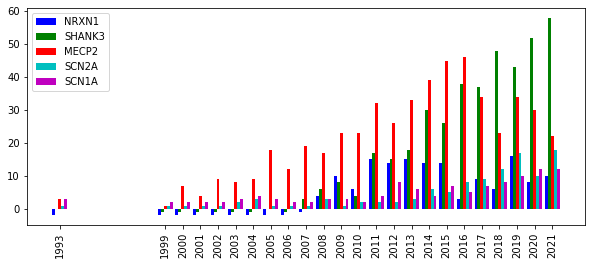

In [14]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

Text(0, 0.5, '# papers published')

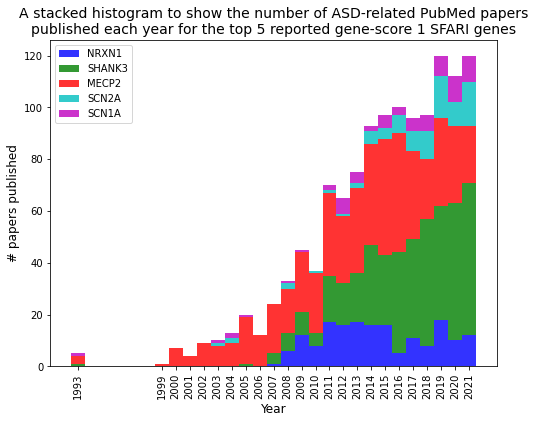

In [96]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(year_data2, range(1993,2023), density=0, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of ASD-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [ ]:
# EXTENSION: plot citations too

ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 5 colors were provided

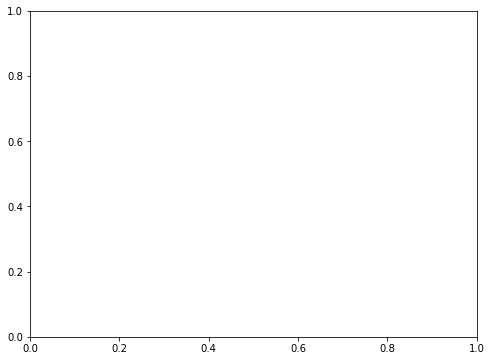

In [41]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(citation_data, range(1993,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported SFARI genes with gene-score 1", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [115]:
Entrez.email = "s1803764@ed.ac.uk"
num_pubs = []

for g in tqdm(gene_symbols):
    handle = Entrez.esearch(db="pubmed",retmax=2000, term=f"({g}) AND (ASD)")
    record = Entrez.read(handle)
    num_pubs.append(len(record["IdList"]))

100%|███████████████████████████████████████| 1023/1023 [10:29<00:00,  1.63it/s]


Text(0, 0.5, '# papers published')

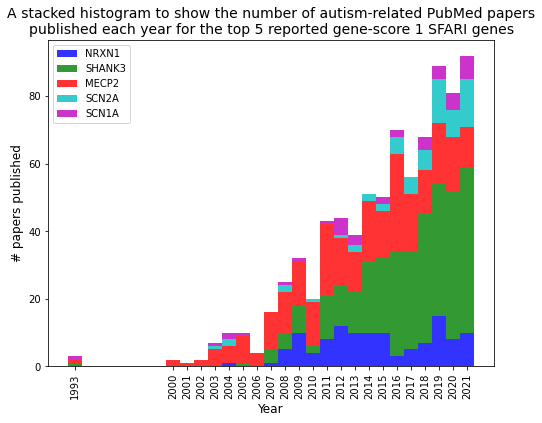

In [254]:
years = np.arange(2000,2022)
year_labels = np.insert(years, 0, 1993)
year_range = np.arange(1993,2023)
n_bins = year_labels.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(all_dates, year_range, density=0, histtype="bar", stacked=True, color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(year_labels+0.5, year_labels, rotation=90)
plt.title("A stacked histogram to show the number of autism-related PubMed papers\npublished each year for the top 5 reported gene-score 1 SFARI genes", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

Text(0, 0.5, '# papers published')

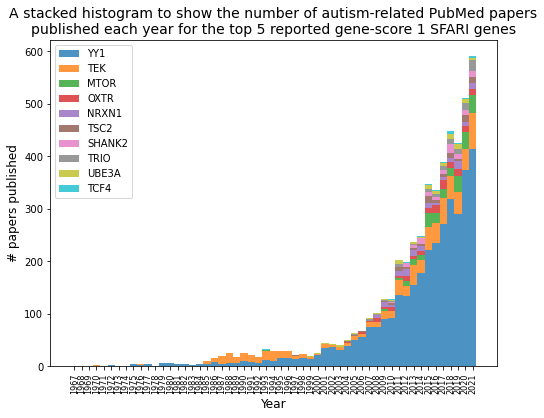

In [281]:
years = np.arange(1967,2022,1)
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

fig = plt.figure(figsize=(8,6))
plt.hist(new_years, range(1967,2023), density=0, histtype="bar", stacked=True, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90, fontsize=8)
plt.title("A stacked histogram to show the 10 SFARI genes with the highest number of autism-related PubMed articles published each year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("# papers published", fontsize=12)
#fig.savefig(f'{os.getcwd()}/results/task1-5-stacked.pdf', dpi=fig.dpi)

In [283]:
data.iloc[996]

status                                                              9
gene-symbol                                                       YY1
gene-name                                     YY1transcription factor
ensembl-id                                            ENSG00000100811
chromosome                                                         14
genetic-category     Rare Single Gene Mutation, Syndromic, Functional
gene-score                                                        NaN
syndromic                                                           1
number-of-reports                                                   5
Name: 996, dtype: object